In [2]:
# import dependencies
import pandas as pd
import pymssql
import matplotlib.pyplot as plt
import seaborn as sns

# set departmental style
sns.set(font="Noto Sans", font_scale=1.5, style="whitegrid")
sns.set_palette(["#083A42", "#28a399", "#801650", "#FF5E00", "#06038D", "#418FDE"])

# collect LOR market notices
def get_lor_events():
    '''Executes 'lor_events.sql', which gathers market notices that refer to actual LOR events.'''
    
    try:
        # establish connection
        with pymssql.connect(
            server="databases-plus-gr.public.f68d1dee025f.database.windows.net",
            port="3342",
            user="dept-energy",
            password="dirty-prejudge-MUTINEER-lyle-castrate",
            database="Historical-MMS"
        ) as connection:
            
            cursor = connection.cursor()

            # SQL query
            with open("./scripts/lor_events.sql", "r") as sql:
                sql_query = sql.read()
                    
            # execute query
            cursor.execute(sql_query)

            # collect results
            data = cursor.fetchall()
            columns = [row[0] for row in cursor.description]
            lor_events = pd.DataFrame(
                data=data,
                columns=columns
            )
            
            # rename columns
            lor_events.columns = ["notice_date", "region", "type", "reference"]
            
            return lor_events

    except pymssql.Error as e:
        print(f"Database error occurred: {e}")
        return None

# forecast LOR events
def get_lor_forecasts():
    '''Executes 'lor_forecasts.sql', which gathers market notices that refer to forecast LOR events.'''
    
    try:
        # establish connection
        with pymssql.connect(
            server="databases-plus-gr.public.f68d1dee025f.database.windows.net",
            port="3342",
            user="dept-energy",
            password="dirty-prejudge-MUTINEER-lyle-castrate",
            database="Historical-MMS"
        ) as connection:
            
            cursor = connection.cursor()

            # SQL query
            with open("./scripts/lor_forecasts.sql", "r") as sql:
                sql_query = sql.read()
                
            # execute query
            cursor.execute(sql_query)

            # collect results
            data = cursor.fetchall()
            columns = [row[0] for row in cursor.description]
            lor_forecasts = pd.DataFrame(
                data=data,
                columns=columns
            )
            
            # rename columns
            lor_forecasts.columns = ["notice_date", "region", "type", "reference"]
            
            return lor_forecasts

    except pymssql.Error as e:
        print(f"Database error occurred: {e}")
        return None

print("Analysing AEMO market notices ...", end="\r")
lor_events = get_lor_events()
lor_events.sort_values(["notice_date", "region"], inplace=True)
lor_forecasts = get_lor_forecasts()
lor_forecasts.sort_values(["notice_date", "region"], inplace=True)
print("Analysing AEMO market notices ... complete.")

# save events to file
print("Saving historic LOR events and forecasts to file ...", end="\r")
lor_events.to_csv("./data/lor_events.csv", index=False)
lor_forecasts.to_csv("./data/lor_forecasts.csv", index=False)
print("Saving historic LOR events and forecasts to file ... complete.")
print("The files 'lor_events.csv' and 'lor_forecasts.csv' are in the 'data' subdirectory.")

# convert to monthly counts
quarterly_lors = lor_events.set_index("notice_date")
quarterly_lors = quarterly_lors.groupby("type").resample("QE").size().unstack(fill_value=0).T
quarterly_lors[quarterly_lors.LOR3 > 0]

Analysing AEMO market notices ... complete.
Saving historic LOR events and forecasts to file ... complete.
The files 'lor_events.csv' and 'lor_forecasts.csv' are in the 'data' subdirectory.


type,LOR1,LOR2,LOR3,LRC
notice_date,,,,
2000-03-31,7,3,1,2
2017-03-31,12,7,2,0
2019-03-31,6,3,2,0
2024-03-31,14,0,1,0


Saving quarterly summary to file ... complete.

Quarterly summary:
type      LOR1  LOR2  LOR3  LRC
quarter                        
Mar 2015     0     4     0    0
Jun 2015     1     6     0    0
Sep 2015     5    11     0    0
Dec 2015     6    23     0    0
Mar 2016     1     1     0    0
Jun 2016     0     0     0    0
Sep 2016     6    11     0    0
Dec 2016     0     9     0    0
Mar 2017    12     7     2    0
Jun 2017     0     0     0    0
Sep 2017     0     0     0    0
Dec 2017     3     0     0    0
Mar 2018     5     1     0    0
Jun 2018     9     3     0    0
Sep 2018     4     0     0    0
Dec 2018     1     0     0    0
Mar 2019     6     3     2    0
Jun 2019     0     0     0    0
Sep 2019     0     0     0    0
Dec 2019     4     1     0    0
Mar 2020     5     7     0    0
Jun 2020     0     0     0    0
Sep 2020     5     0     0    0
Dec 2020    15     1     0    0
Mar 2021     3     1     0    0
Jun 2021    30     2     0    0
Sep 2021    18     4     0    0
Dec 2

findfont: Font family 'Noto Sans' not found.
findfont: Font family 'Noto Sans' not found.
findfont: Font family 'Noto Sans' not found.
findfont: Font family 'Noto Sans' not found.
findfont: Font family 'Noto Sans' not found.
findfont: Font family 'Noto Sans' not found.
findfont: Font family 'Noto Sans' not found.
findfont: Font family 'Noto Sans' not found.
findfont: Font family 'Noto Sans' not found.
findfont: Font family 'Noto Sans' not found.
findfont: Font family 'Noto Sans' not found.
findfont: Font family 'Noto Sans' not found.
findfont: Font family 'Noto Sans' not found.
findfont: Font family 'Noto Sans' not found.
findfont: Font family 'Noto Sans' not found.
findfont: Font family 'Noto Sans' not found.
findfont: Font family 'Noto Sans' not found.
findfont: Font family 'Noto Sans' not found.
findfont: Font family 'Noto Sans' not found.
findfont: Font family 'Noto Sans' not found.
findfont: Font family 'Noto Sans' not found.
findfont: Font family 'Noto Sans' not found.
findfont: 

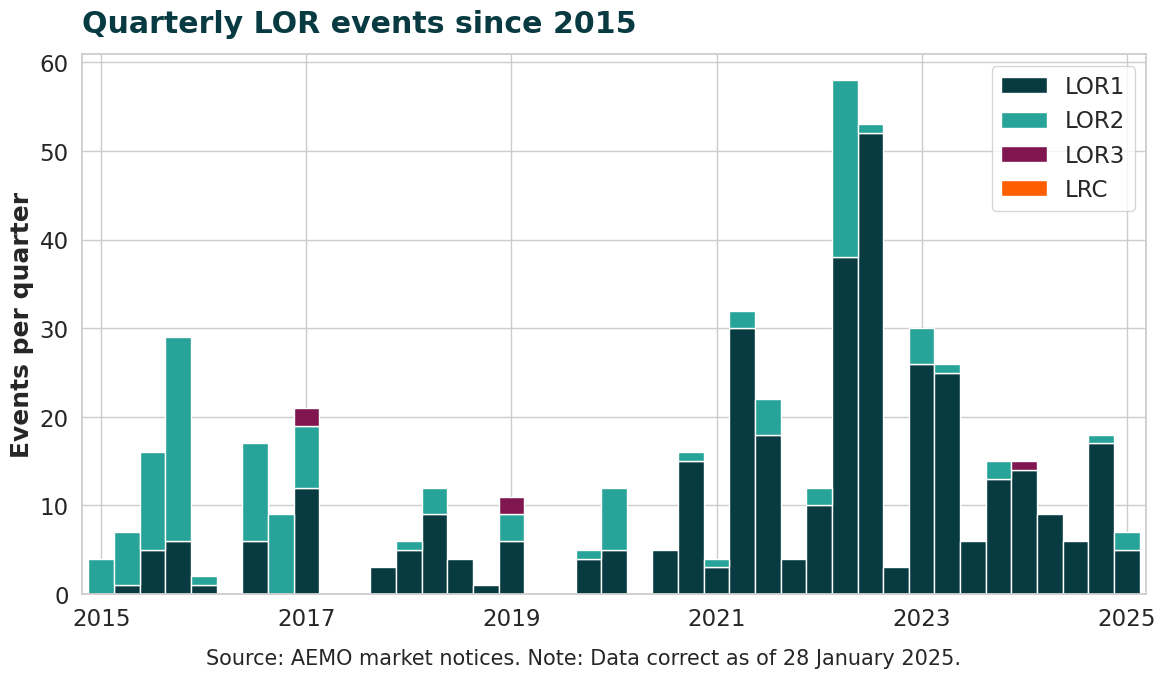

In [3]:
# limit to past 10 years
current_year = pd.to_datetime("today").year
quarterly_lors = quarterly_lors[pd.to_datetime(f"{current_year - 10}-01-01"):]

# print and save results
quarterly_lors.index = [f"{q:%b %Y}" for q in quarterly_lors.index]
quarterly_lors.index.name = "quarter"
print("Saving quarterly summary to file ...", end="\r")
lor_events.to_csv("./data/lor_events_quarters.csv")
print("Saving quarterly summary to file ... complete.")
print("\nQuarterly summary:")
print(quarterly_lors)

# plot monthly LOR events
fig, ax = plt.subplots(figsize=(12, 6.75), tight_layout=True)

quarterly_lors.plot(
    ax=ax,
    kind="bar",
    stacked=True,
    width=1
)
ticks = ax.get_xticks()
ax.set_xticks(ticks[::8])
ax.set_xticklabels([
    quarterly_lors.index[i][-4:] for i in range(len(quarterly_lors.index))
][::8], rotation=0)
plt.xlabel(None)
plt.ylabel("Events per quarter", fontweight="bold")
plt.legend(title=None)
plt.title(f"Quarterly LOR events since {current_year - 10}", loc="left", fontsize="large", fontweight="bold", pad=16, color="C0")
plt.figtext(
    x=.5,
    y=-.01,
    s=f"Source: AEMO market notices. Note: Data correct as of {pd.to_datetime('today'):%#d %B %Y}.",
    ha="center",
    fontsize="small"
)
plt.savefig("./data/lor_events_chart.png", bbox_inches="tight")
plt.show()

TypeError: 'Timestamp' object is not subscriptable

findfont: Font family 'Noto Sans' not found.
findfont: Font family 'Noto Sans' not found.
findfont: Font family 'Noto Sans' not found.
findfont: Font family 'Noto Sans' not found.
findfont: Font family 'Noto Sans' not found.
findfont: Font family 'Noto Sans' not found.
findfont: Font family 'Noto Sans' not found.
findfont: Font family 'Noto Sans' not found.
findfont: Font family 'Noto Sans' not found.
findfont: Font family 'Noto Sans' not found.
findfont: Font family 'Noto Sans' not found.
findfont: Font family 'Noto Sans' not found.
findfont: Font family 'Noto Sans' not found.
findfont: Font family 'Noto Sans' not found.
findfont: Font family 'Noto Sans' not found.
findfont: Font family 'Noto Sans' not found.
findfont: Font family 'Noto Sans' not found.
findfont: Font family 'Noto Sans' not found.
findfont: Font family 'Noto Sans' not found.
findfont: Font family 'Noto Sans' not found.
findfont: Font family 'Noto Sans' not found.
findfont: Font family 'Noto Sans' not found.
findfont: 

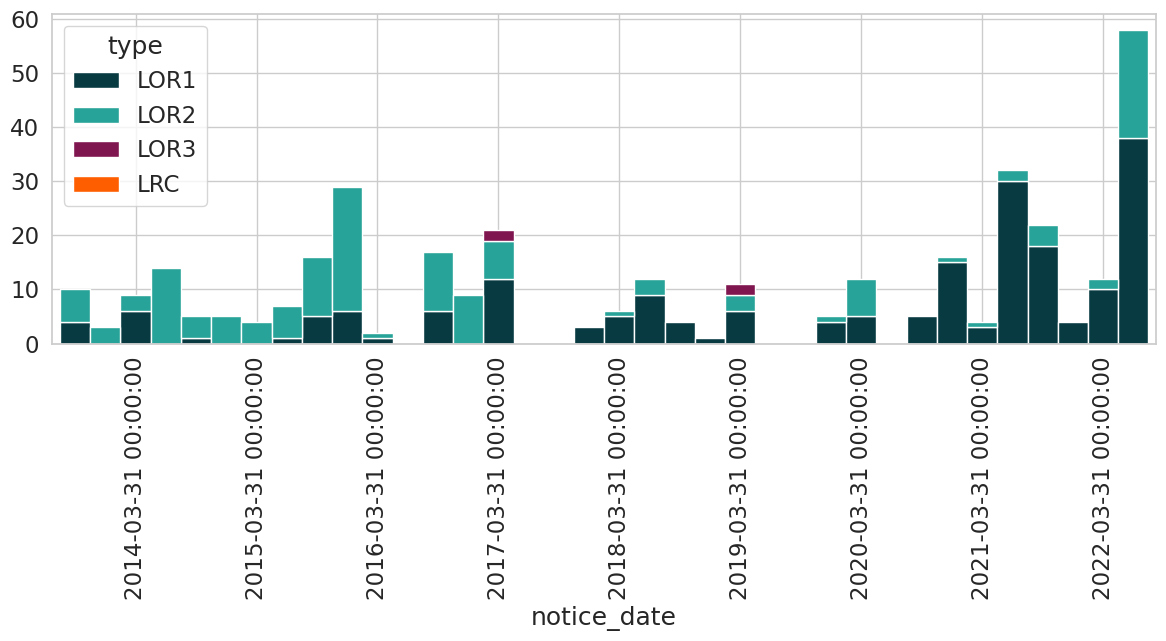

In [6]:
# convert to quarterly counts
quarterly_lors = lor_events.set_index("notice_date")
quarterly_lors = quarterly_lors.groupby("type").resample("QE").size().unstack(fill_value=0).T

# limit to specific period
quarterly_lors = quarterly_lors.loc["2013-09-30":"2022-06-30"]

# plot monthly LOR events
fig, ax = plt.subplots(figsize=(12, 6.75), tight_layout=True)

quarterly_lors.plot(
    ax=ax,
    kind="bar",
    stacked=True,
    width=1
)
ticks = ax.get_xticks()
ax.set_xticks(ticks[2::4])
ax.set_xticklabels([
    quarterly_lors.index[i][-4:] for i in range(len(quarterly_lors.index))
][::8], rotation=0)
plt.xlabel(None)
plt.ylabel("Events per quarter", fontweight="bold")
plt.legend(title=None)
plt.title(f"Quarterly LOR events since {current_year - 10}", loc="left", fontsize="large", fontweight="bold", pad=16, color="C0")
plt.figtext(
    x=.5,
    y=-.01,
    s=f"Source: AEMO market notices. Note: Data correct as of {pd.to_datetime('today'):%#d %B %Y}.",
    ha="center",
    fontsize="small"
)
plt.show()

In [ ]:
lor_events_a = lor_events[
    (lor_events["notice_date"] >= "2013-09-18") &
    (lor_events["notice_date"] < "2022-05-22")
]
lor_forecasts_a = lor_forecasts[
    (lor_forecasts["notice_date"] >= "2013-09-18") &
    (lor_forecasts["notice_date"] < "2022-05-22")
]

lor_events_b = lor_events_a.pivot_table(
    index="notice_date",
    columns="type",
    values="region",
    aggfunc="count"
).fillna(0).resample("QE").sum()

lor_forecasts_b = lor_forecasts_a.pivot_table(
    index="notice_date",
    columns="type",
    values="region",
    aggfunc="count"
).fillna(0).resample("QE").sum()


# plot monthly LOR events
fig, ax = plt.subplots(figsize=(12, 6.75), tight_layout=True)

for i in range(len(lor_events_b.columns)):
    floor = lor_events_b.iloc[:, :i].sum(axis=1)
    ceiling = lor_events_b.iloc[:, :i + 1].sum(axis=1)
    ax.fill_between(
        x=lor_events_b.index,
        y1=floor,
        y2=ceiling,
        step="pre",        
        color=f"C{i}",
        linewidth=0,
        label=lor_events_b.columns[i]
    )
plt.xlabel(None)
plt.ylabel("Events per quarter", fontweight="bold")
plt.legend(title=None)
plt.suptitle(f"Quarterly LOR events", fontsize="large", fontweight="bold", color="C0", ha="left", va="top", x=.025, y=.95)
plt.title(f"18 September 2013 to 21 May 2022", loc="left", pad=16, color="C0")
plt.margins(0)
plt.show()

# plot monthly LOR forecasts
fig, ax = plt.subplots(figsize=(12, 6.75), tight_layout=True)

for i in range(len(lor_forecasts_b.columns)):
    floor = lor_forecasts_b.iloc[:, :i].sum(axis=1)
    ceiling = lor_forecasts_b.iloc[:, :i + 1].sum(axis=1)
    ax.fill_between(
        x=lor_forecasts_b.index,
        y1=floor,
        y2=ceiling,
        step="pre",        
        color=f"C{i}",
        linewidth=0,
        label=lor_forecasts_b.columns[i]
    )
plt.xlabel(None)
plt.ylabel("Forecasts per quarter", fontweight="bold")
plt.legend(title=None)
plt.suptitle(f"Quarterly LOR forecasts", fontsize="large", fontweight="bold", color="C0", ha="left", va="top", x=.025, y=.95)
plt.title(f"18 September 2013 to 21 May 2022", loc="left", pad=16, color="C0")
plt.margins(0)
plt.show()

NameError: name 'lor_events' is not defined